### Decision Tree Regression
CART - Classification and Regression Tree
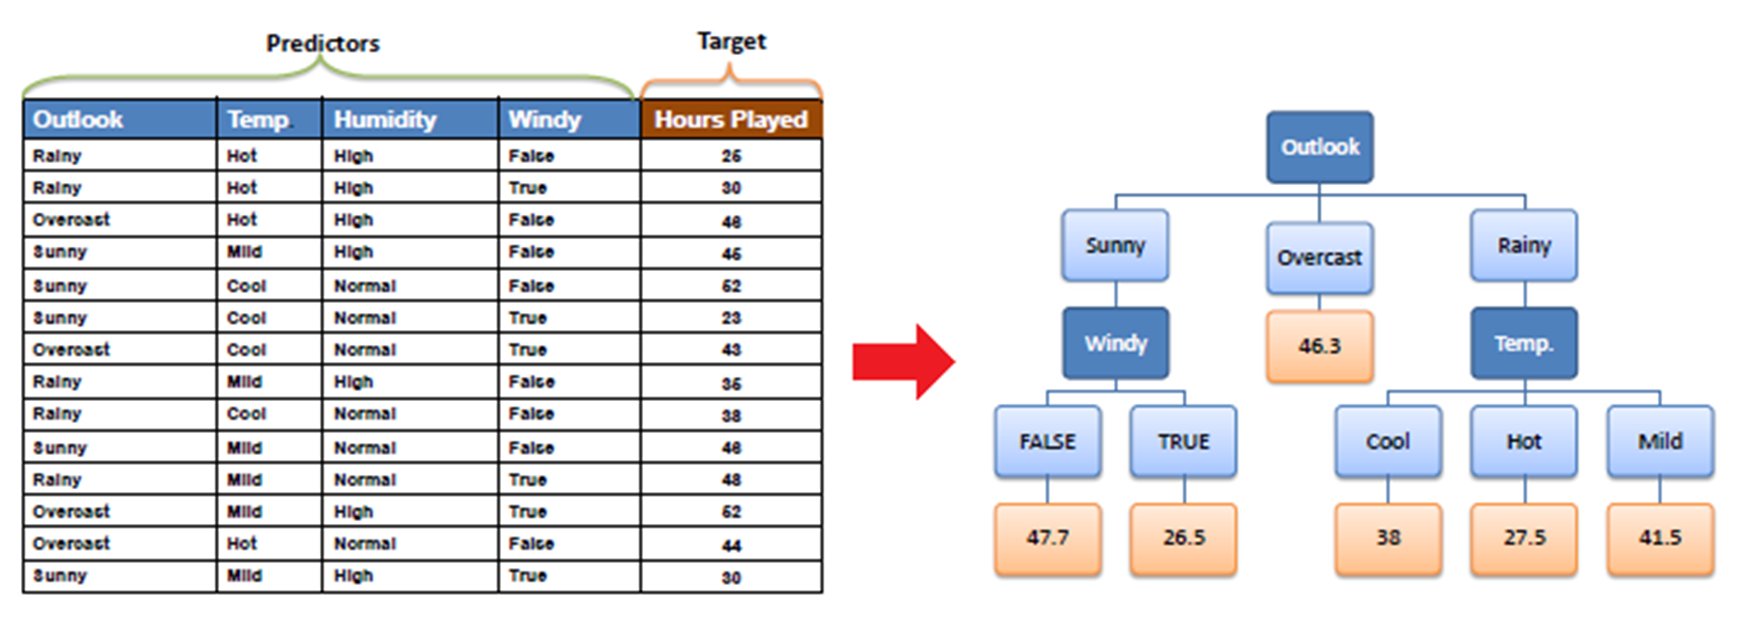

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Features
1. AT - Autmospheric Temperature in degree celsius
2. V - Vacuum Pressure Pa
3. Ap - Atmospheric Pressure Pa
4. RH - Relative Humidity %
5. PE - Energy output of plant in Mega watts

#### PE is the Target feature which is numeric in nature

### Step 2 - Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(41)

In [6]:
# Drop duplicated
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [8]:
df.shape

(9527, 5)

### Step 3 - Seperate X and Y(PE)

In [9]:
X = df.drop(columns="PE")
Y = df[["PE"]]

In [10]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4 - Apply preprocessing on X

In [12]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Step 5 - train_test_split

In [16]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.4, random_state=42)

In [17]:
xtrain.head()

,AT,V,AP,RH
8723,-1.394172,-1.005343,0.857362,0.448769
3948,0.048599,1.026876,-0.199839,0.205730
5317,0.427428,-0.334506,-1.287341,0.421384
2815,1.686159,1.104128,0.286676,-1.639992
6502,-0.649949,-0.765702,1.160382,0.105776


In [18]:
ytrain.head()

,PE
8723,482.80
3948,445.31
5317,442.85
2815,429.66
6502,473.17


In [19]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [20]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


### Step 6 - Build the decision tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(
    max_depth=1,
    min_samples_split=5, 
    min_samples_leaf=5,
    criterion="squared_error"
)

model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [23]:
# R2 score in train
model.score(xtrain, ytrain)

0.716376041459884

In [24]:
# R2 score in test
model.score(xtest, ytest)

0.7253797796531443

### Hyperparameter tuning

In [26]:
import numpy as np

In [29]:
params = {
    "max_depth" : np.arange(2,21),
    "min_samples_split" : np.arange(5,21),
    "min_samples_leaf" : np.arange(5,21),
    "criterion" : ["squared_error", "absolute_error"]
}

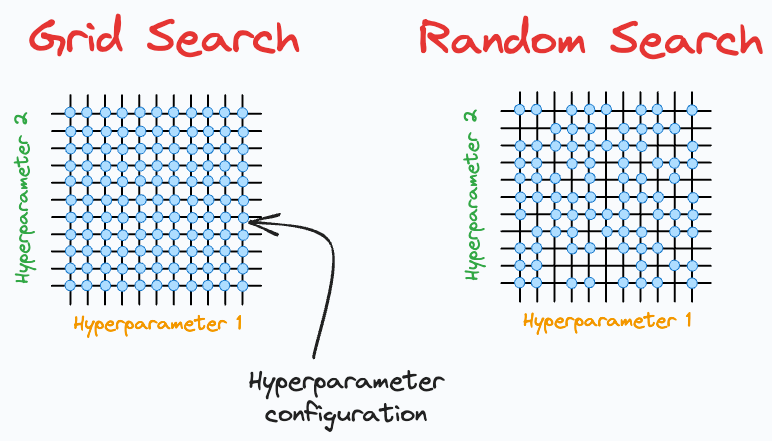

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
base_model = DecisionTreeRegressor()

rscv = RandomizedSearchCV(base_model, param_distributions=params, cv = 5, scoring='neg_mean_squared_error')

rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                                        'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])},
                   scoring='neg_mean_squared_error')

In [33]:
rscv.best_params_

{'min_samples_split': np.int64(13),
 'min_samples_leaf': np.int64(8),
 'max_depth': np.int64(8),
 'criterion': 'squared_error'}

In [34]:
rscv.best_score_

np.float64(-18.163649148586998)

In [35]:
best_dtr = rscv.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=np.int64(8), min_samples_leaf=np.int64(8),
                      min_samples_split=np.int64(13))

### Step 7 - Evaluate model

In [36]:
best_dtr.score(xtrain, ytrain)

0.9553481977012173

In [37]:
best_dtr.score(xtest, ytest)

0.9458305424289702

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_dtr, xtrain, ytrain, cv=5, scoring="r2")

scores

array([0.93166267, 0.93245246, 0.94264808, 0.93724462, 0.94056639])

In [39]:
scores.mean()

np.float64(0.9369148433416983)

In [41]:
scores2 = cross_val_score(best_dtr, xtrain, ytrain, cv=5,scoring='neg_mean_squared_error')

scores2.mean()

np.float64(-18.163649148587005)

In [42]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [43]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    print(f"RMSE = {rmse:.2f}")
    print(f"MAE = {mae:.2f}")
    print(f"MAPE = {mape:.2%}")
    print(f"R2 = {r2:.2%}")


In [44]:
print("Training Results")
evaluate_model(best_dtr, xtrain, ytrain)

Training Results
RMSE = 3.59
MAE = 2.66
MAPE = 0.59%
R2 = 95.53%


In [45]:
print("Testing Results")
evaluate_model(best_dtr, xtest, ytest)

Testing Results
RMSE = 3.99
MAE = 3.06
MAPE = 0.67%
R2 = 94.58%


### Above results has r2_score>0.8 hence it can be used out of sample predicion
### Plot the tree

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

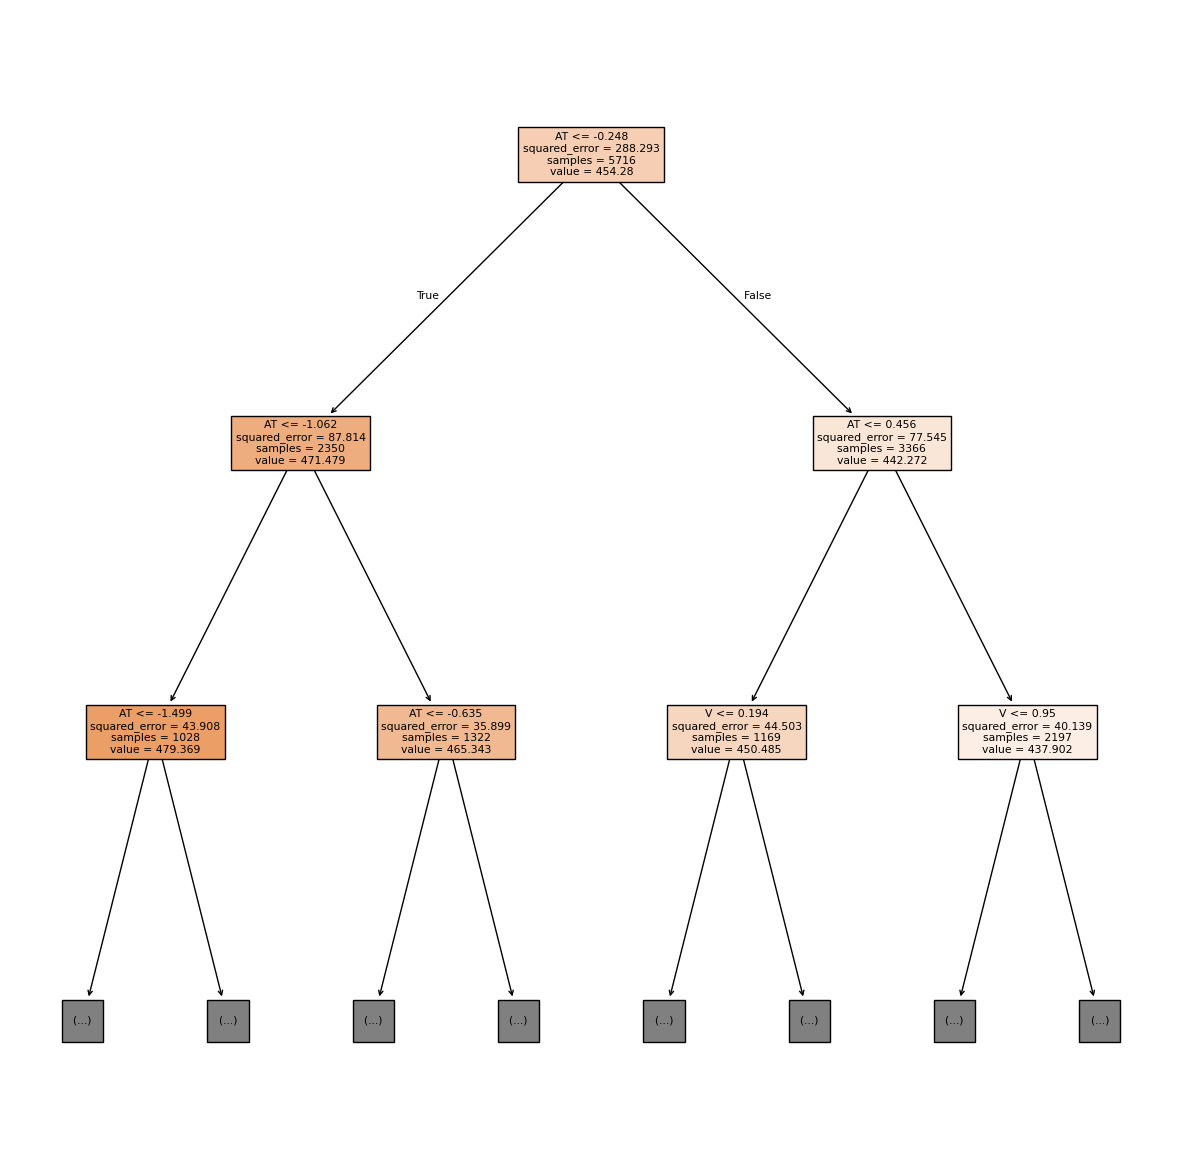

In [48]:
plt.figure(figsize=(15,15))
plot_tree(best_dtr, feature_names=xtrain.columns, max_depth=2, filled=True)
plt.show()

In [49]:
best_dtr.feature_importances_

array([0.93252598, 0.05043862, 0.00927192, 0.00776348])

In [50]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [52]:
imp = pd.Series(best_dtr.feature_importances_, index=xtrain.columns)
imp

AT    0.932526
V     0.050439
AP    0.009272
RH    0.007763
dtype: float64

<Axes: >

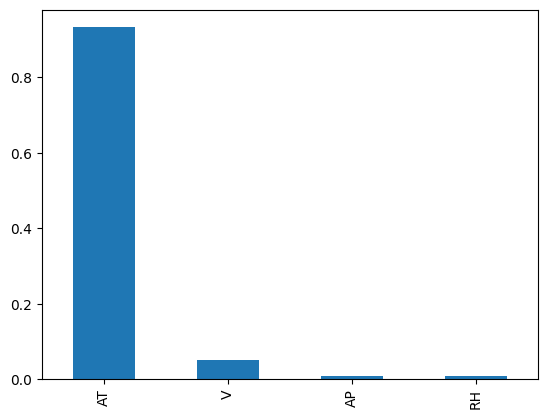

In [53]:
imp.sort_values(ascending=False).plot(kind="bar")

### Step 8 - out of sample predictions

In [54]:
xnew = pd.read_csv('PowerPlantTest.csv')
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [55]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [56]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [57]:
preds = best_dtr.predict(xnew_pre)
preds

array([445.0095, 436.925 , 436.925 ])

In [58]:
xnew["PE"] = preds
xnew

,AT,V,AP,RH,PE
0,25,51.5,1000.1,57.0,445.0095
1,32,41.0,1051.1,80.0,436.9250
2,28,NaN,1010.2,NaN,436.9250


In [59]:
xnew.to_csv('results.csv', index=False)

### Save the model preprocessing in joblib format

In [60]:
import joblib

joblib.dump(best_dtr, "pre.joblib")

['pre.joblib']

In [61]:
joblib.dump(best_dtr, "PowerModel.joblib")

['PowerModel.joblib']

### Load the models

In [62]:
p = joblib.load("pre.joblib")
p

DecisionTreeRegressor(max_depth=np.int64(8), min_samples_leaf=np.int64(8),
                      min_samples_split=np.int64(13))

In [64]:
m = joblib.load("PowerModel.joblib")
m

DecisionTreeRegressor(max_depth=np.int64(8), min_samples_leaf=np.int64(8),
                      min_samples_split=np.int64(13))